Synthesizing SymbTr scores
========

XX

In [1]:
# import relevant libraries
import json
import os
%pdb

from symbtrsynthesis.adaptivesynthesizer import AdaptiveSynthesizer

Automatic pdb calling has been turned ON


In [2]:
# define inputs
data_folder = 'sampledata'
score_file = os.path.join(data_folder, 'ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.xml')

# reference audio
audio_mbid = 'f970f1e0-0be9-4914-8302-709a0eac088e'
audio_file = os.path.join(data_folder, audio_mbid, audio_mbid + '.mp3')

1. Synthesis wrt Arel-Ezgi-Uzdilek theory
------------------------------------

XX

In [3]:
# synthesize wrt the Arel-Ezgi-Uzdilek theory
AdaptiveSynthesizer.synthesize(score_file, synth_type='karplus', verbose=False)

INFO:root:Reading the MusicXML file: sampledata/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.xml
INFO:root:Synthesizing the score wrt AEU theory


2.1 Synthesis wrt a reference recording
-----------------------------------

XX

In [4]:
# reference audio
AdaptiveSynthesizer.synthesize(score_file, ref_rec=audio_file, synth_type='karplus', verbose=False)

INFO:root:Reading the MusicXML file: sampledata/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.xml
INFO:root:Synthesizing the score wrt the recording: sampledata/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
INFO:root:... Extracting the predominant melody
INFO:root:... Extracting the tonic
INFO:root:... Extracting the tuning
INFO:root:Replacing the pitches wrt the audio tuning


2.2 Step by step adaptive synthesis
--------

XX

In [5]:
# import relevant libraries
import json
import os

from predominantmelodymakam.predominantmelodymakam import PredominantMelodyMakam
from pitchfilter.pitchfilter import PitchFilter
from tonicidentifier.toniclastnote import TonicLastNote
from morty.pitchdistribution import PitchDistribution
from notemodel.notemodel import NoteModel

from symbtrsynthesis.musicxmlreader import MusicXMLReader
from symbtrsynthesis.adaptivesynthesizer import AdaptiveSynthesizer

from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
# define inputs
data_folder = 'sampledata'
score_file = os.path.join(data_folder, 'ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.xml')

(measures, makam, usul, form, time_sigs, keysig, work_title, composer, lyricist, bpm, tnc_sym) = MusicXMLReader.read(score_file)

audio_mbid = 'f970f1e0-0be9-4914-8302-709a0eac088e'
audio_file = os.path.join(data_folder, audio_mbid, audio_mbid + '.mp3')

2.2.2 Audio Tuning Analysis
----------------------------

In [7]:
# extract predominant melody
melody_extractor = PredominantMelodyMakam()
pitch = melody_extractor.extract(audio_file)['pitch']

In [8]:
# Post process the pitch track to get rid of spurious pitch estimations and correct octave errors
pitch_filter = PitchFilter()
pitch = pitch_filter.run(pitch)

In [9]:
# tonic identification for the related recording of SymbTr
tonic_identifier = TonicLastNote()
tonic = tonic_identifier.identify(pitch)[0]

In [10]:
# compute the pitch distribution
pitch_distribution = PitchDistribution.from_hz_pitch(pitch[:,1], ref_freq=tonic['value'])

In [11]:
# obtain the tuning
model = NoteModel()
stablenotes = model.calculate_notes(pitch_distribution, tonic['value'], makam,
                                    min_peak_ratio=0.1)

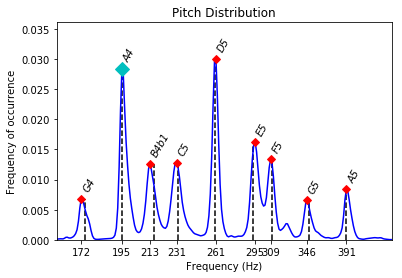

In [12]:
# plot the tuning
model.plot(pitch_distribution, stablenotes)
plt.xlim([160, 450])
plt.show()

2.2.3 Adapting the tuning and synthesizing the SymbTr-score
-----------

This part synthesizes the score according to the related audio recording.
Extracted stable pitches are used as reference in synthesis.

**It takes a time w.r.t. the length of given SymbTr.**
If you want to observe the status of the process, give *"verbose"* flag as *true*.

Possible synth types are *'sine'* and *'karplus'*. *'sine'* option takes less time.

In [13]:
AdaptiveSynthesizer.synth_from_tuning(measures=measures, bpm=bpm, stable_notes=stablenotes, 
                                      tonic_sym=tnc_sym, synth_type='karplus', verbose=False)

INFO:root:Replacing the pitches wrt the audio tuning
